<a href="https://colab.research.google.com/github/Raksh-iscool/Tasks/blob/main/Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [8]:
# Load and resize image
image = cv2.imread('/content/apple.jpg')  # Replace with your actual image path
image = cv2.resize(image, (300, 300))
original = image.copy()


In [9]:
# Flatten the image and apply KMeans
pixels = image.reshape((-1, 3))
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(pixels)
segmented = kmeans.cluster_centers_[kmeans.labels_].reshape(image.shape).astype(np.uint8)


In [10]:
# Convert to grayscale and apply threshold
gray = cv2.cvtColor(segmented, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


In [11]:
# Find contours and draw bounding boxes on original image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    if w > 20 and h > 20:  # Skip small regions
        cv2.rectangle(original, (x, y), (x + w, y + h), (0, 255, 0), 2)


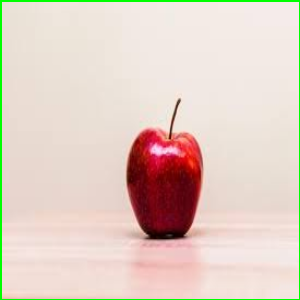

In [12]:
from google.colab.patches import cv2_imshow

cv2_imshow(original)


In [13]:
print("Number of contours found:", len(contours))


Number of contours found: 1


Saving apple.jpg to apple (1).jpg


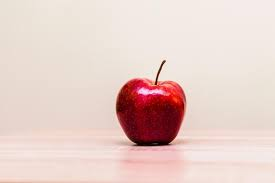

In [14]:
from google.colab import files
uploaded = files.upload()

# Read uploaded image
img_path = list(uploaded.keys())[0]
original = cv2.imread(img_path)
cv2_imshow(original)


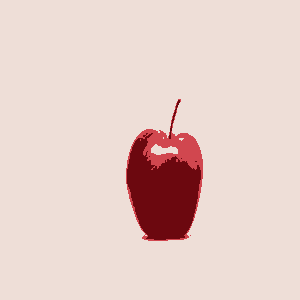

In [15]:
# Resize if too large
img = cv2.resize(original, (300, 300))

# Flatten the image
pixel_vals = img.reshape((-1, 3))
pixel_vals = np.float32(pixel_vals)

# Apply KMeans
k = 3  # You can tweak this
kmeans = KMeans(n_clusters=k, random_state=0)
labels = kmeans.fit_predict(pixel_vals)
centers = np.uint8(kmeans.cluster_centers_)

# Recreate image
segmented_data = centers[labels.flatten()]
clustered_img = segmented_data.reshape(img.shape)

cv2_imshow(clustered_img)


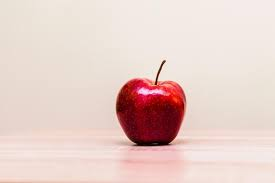

In [16]:
# Convert to grayscale
gray = cv2.cvtColor(clustered_img, cv2.COLOR_BGR2GRAY)

# Thresholding
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes (filtering out huge or tiny ones)
output = original.copy()
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    area = w * h
    img_area = output.shape[0] * output.shape[1]
    if area > 0.9 * img_area or area < 100:
        continue  # skip full image or tiny noise
    cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(output)


In [17]:
print("Number of contours found:", len(contours))


Number of contours found: 1


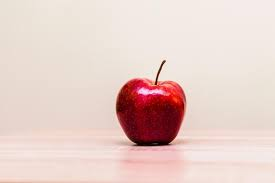

In [18]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('/content/apple.jpg')
cv2_imshow(img)


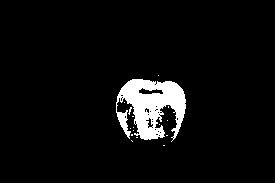

In [19]:
# Convert to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define red color ranges in HSV
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([179, 255, 255])

# Create two masks for red and combine
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask = cv2.bitwise_or(mask1, mask2)

cv2_imshow(mask)


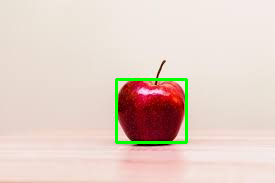

In [20]:
# Find contours from mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes on a copy of the image
output = img.copy()
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 500:  # Filter small noise
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(output, (x, y), (x+w, y+h), (0, 255, 0), 2)

cv2_imshow(output)


In [23]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if not ret:
        break

    small = cv2.resize(frame, (200, 200))
    data = small.reshape((-1, 3))
    kmeans.fit(data)
    clustered = kmeans.cluster_centers_[kmeans.labels_].reshape(small.shape).astype(np.uint8)

    gray = cv2.cvtColor(clustered, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if w > 20 and h > 20:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

    cv2.imshow("Real-time Cluster Detection", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
